In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
data = pd.read_csv("./LSTM-Multivariate_pollution.csv")
data.head()

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pollution  43800 non-null  float64
 1   dew        43800 non-null  int64  
 2   temp       43800 non-null  float64
 3   press      43800 non-null  float64
 4   wnd_dir    43800 non-null  int32  
 5   wnd_spd    43800 non-null  float64
 6   snow       43800 non-null  int64  
 7   rain       43800 non-null  int64  
dtypes: float64(4), int32(1), int64(3)
memory usage: 2.5 MB


In [35]:
data.describe()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,94.013516,1.828516,12.459041,1016.447306,1.663516,23.894307,0.052763,0.195023
std,92.252276,14.429326,12.193384,10.271411,0.938032,50.022729,0.760582,1.416247
min,0.000000,-40.000000,-19.000000,991.000000,0.000000,0.450000,0.000000,0.000000
25%,24.000000,-10.000000,2.000000,1008.000000,1.000000,1.790000,0.000000,0.000000
50%,68.000000,2.000000,14.000000,1016.000000,2.000000,5.370000,0.000000,0.000000
75%,132.250000,15.000000,23.000000,1025.000000,2.000000,21.910000,0.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,3.000000,585.600000,27.000000,36.000000


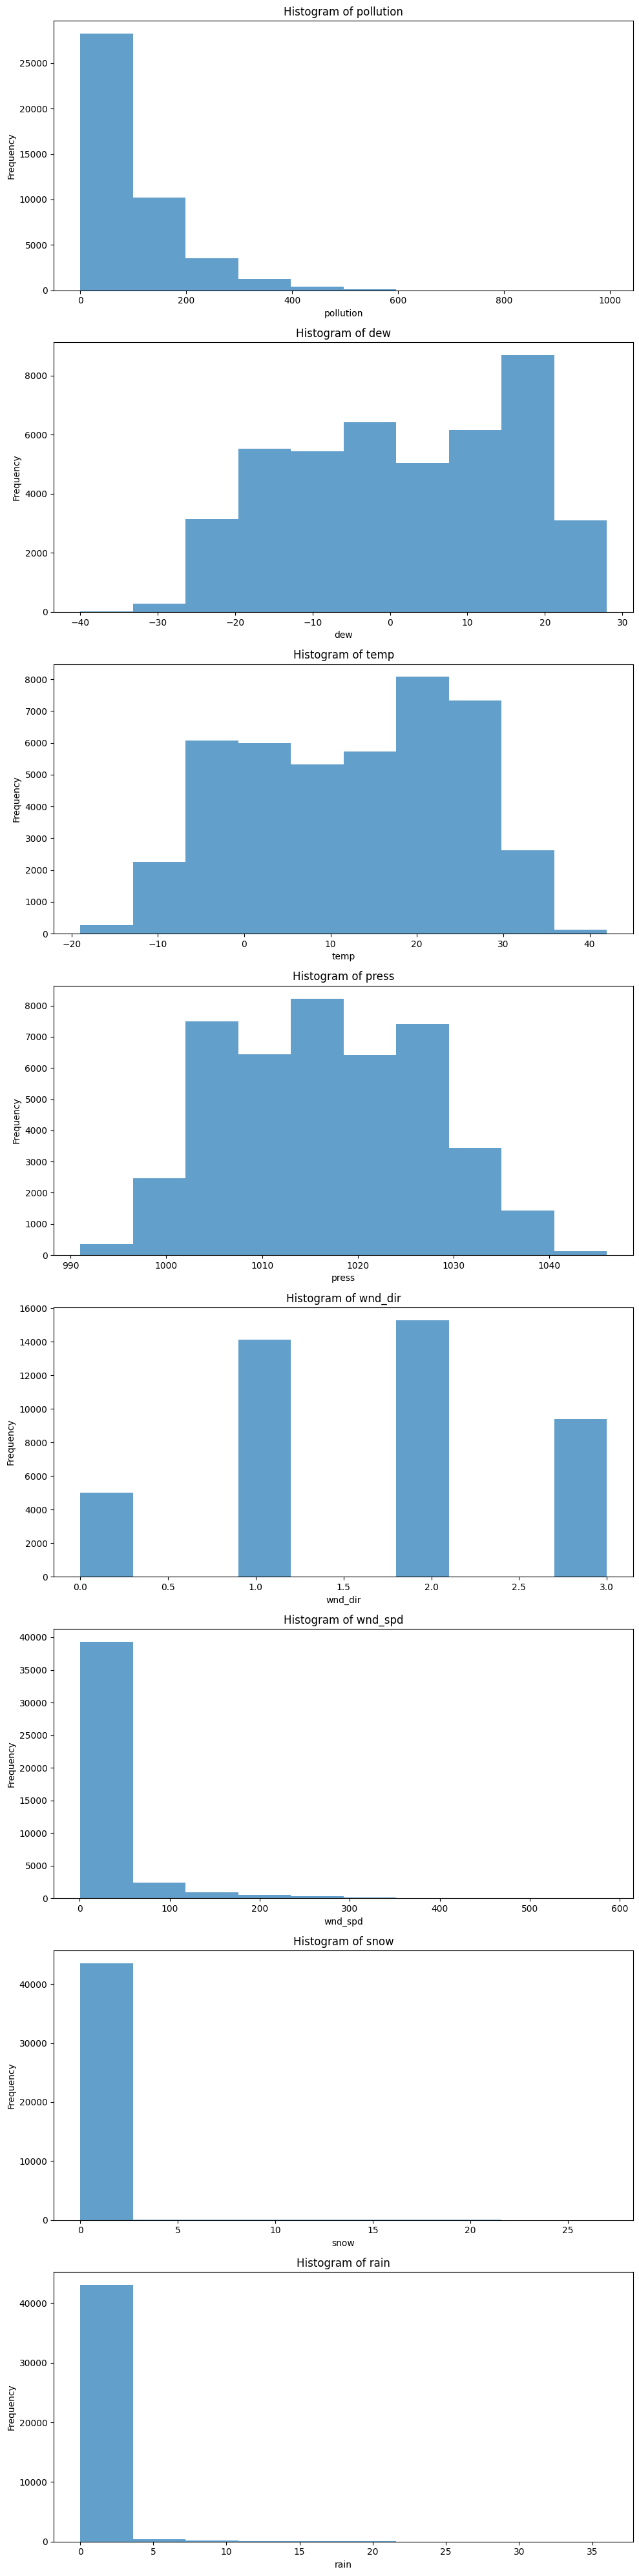

In [37]:
num_columns = len(data.columns)

# Create subplots
fig, axs = plt.subplots(num_columns, 1, figsize=(10, 5 * num_columns))

# Iterate through each column and create a histogram
for i, column in enumerate(data.columns):
    axs[i].hist(data[column], bins=10, alpha=0.7)
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

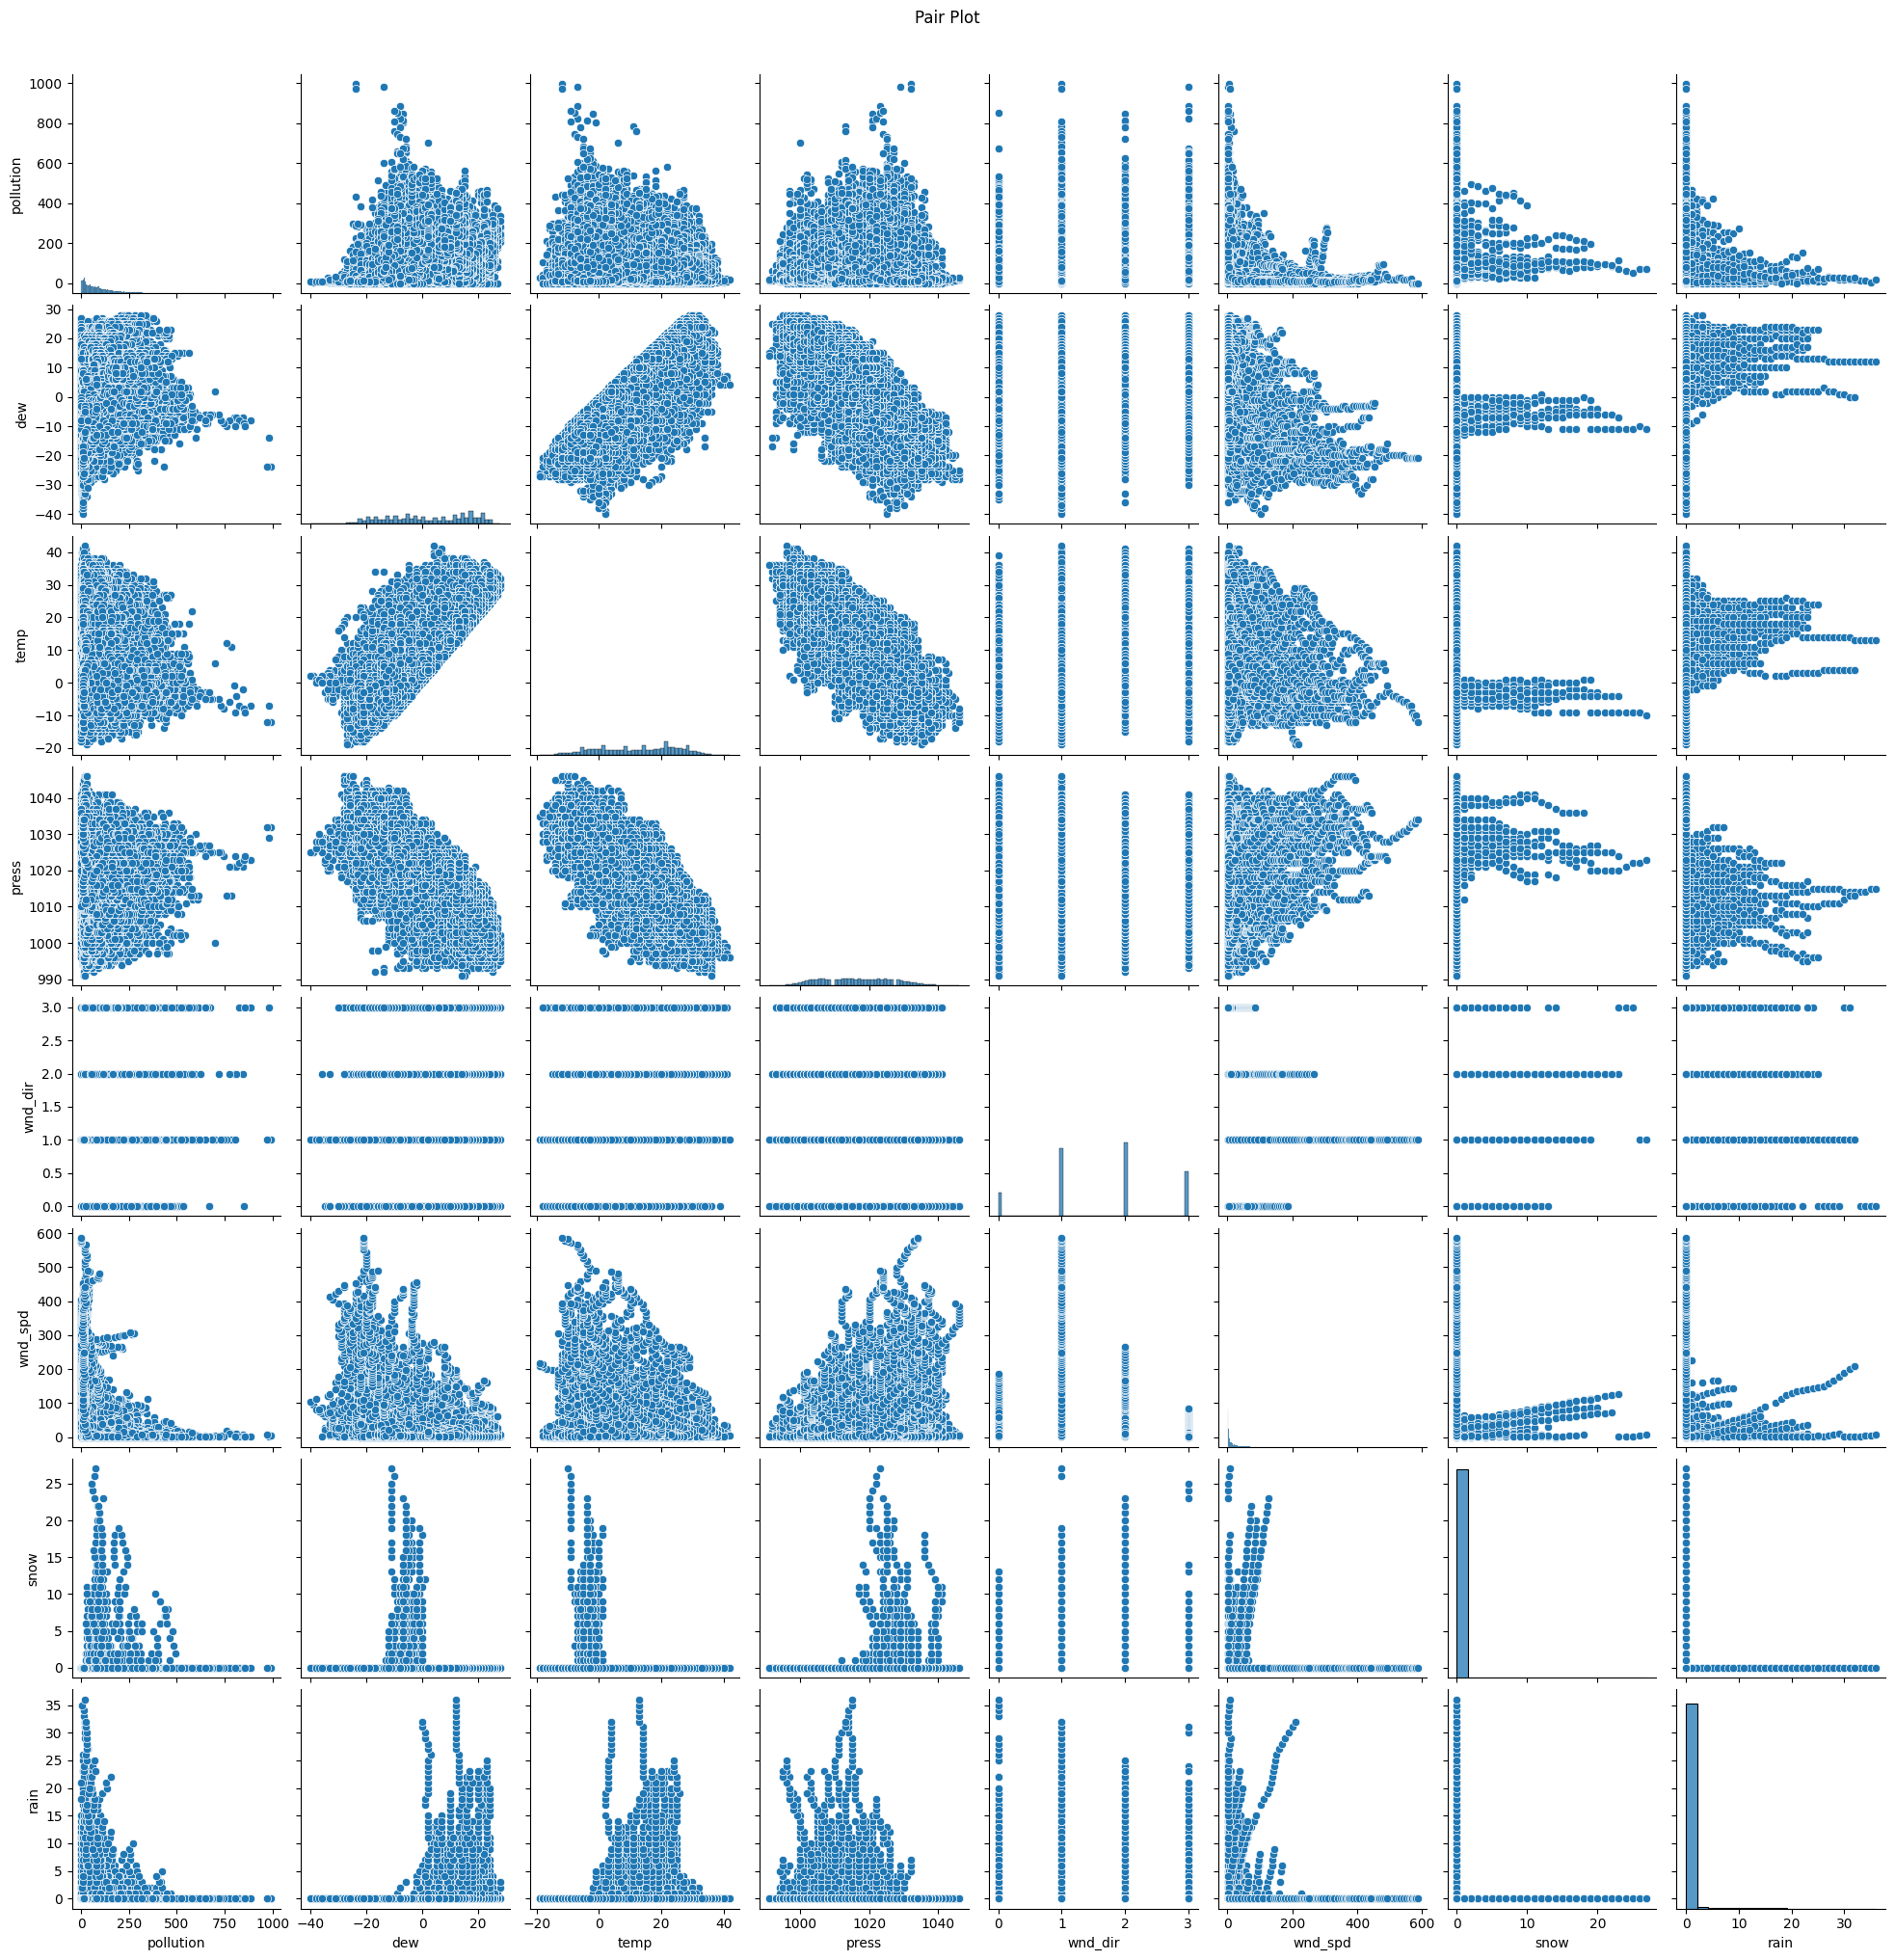

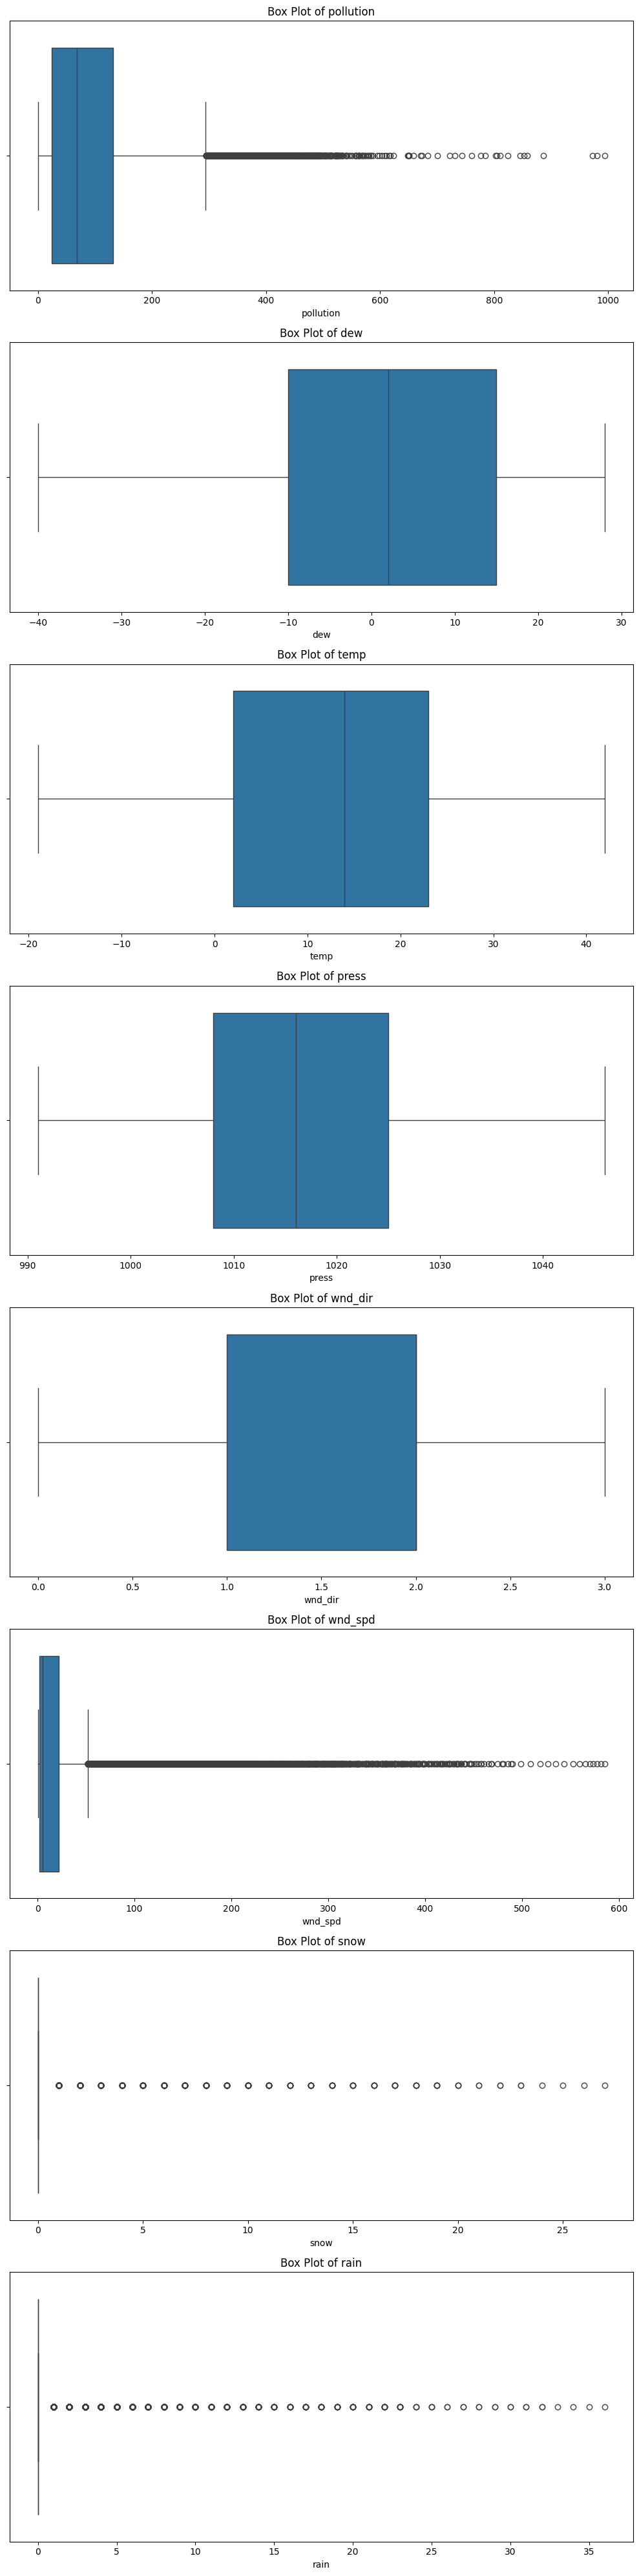

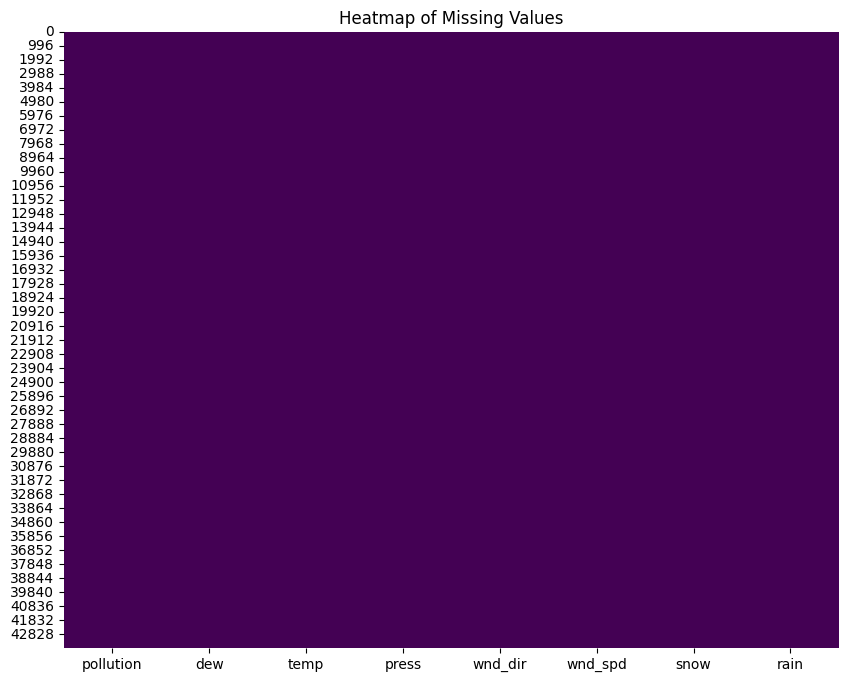

In [38]:
sns.pairplot(data)
plt.suptitle('Pair Plot', y=1.02)
plt.show()

# 5. Box Plots
fig, axs = plt.subplots(num_columns, 1, figsize=(10, 5 * num_columns))

for i, column in enumerate(data.columns):
    sns.boxplot(x=data[column], ax=axs[i])
    axs[i].set_title(f'Box Plot of {column}')
    axs[i].set_xlabel(column)

plt.tight_layout()
plt.show()

# 6. Heatmap of Missing Values
plt.figure(figsize=(10, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

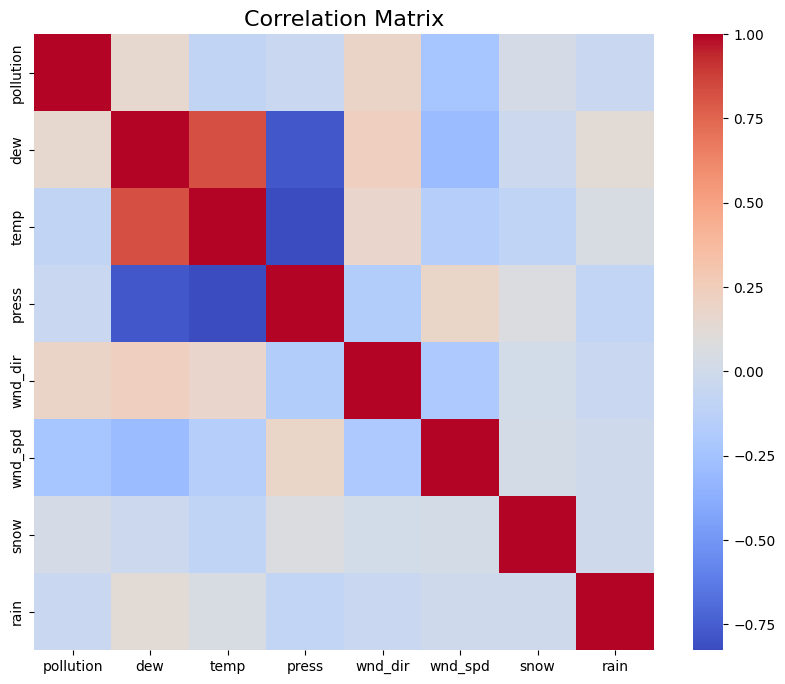

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [3]:
data = data.drop('date', axis=1)

label_encoder = LabelEncoder()
data['wnd_dir'] = label_encoder.fit_transform(data['wnd_dir'])

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

sequence_length = 24  
generator = TimeseriesGenerator(data_normalized, data_normalized, length=sequence_length, batch_size=1)

train_size = int(len(generator) * 0.8)
train_generator = TimeseriesGenerator(data_normalized, data_normalized, length=sequence_length, start_index=0, end_index=train_size, batch_size=1)
test_generator = TimeseriesGenerator(data_normalized, data_normalized, length=sequence_length, start_index=train_size, batch_size=1)


In [47]:
def draw_train_loss(final_cnn_history):
    train_loss = final_cnn_history.history['loss']
    test_loss = final_cnn_history.history['val_loss']
    train_accuracy = final_cnn_history.history['r2_score']
    test_accuracy = final_cnn_history.history['val_r2_score']

    fig, ax = plt.subplots(ncols=2, figsize=(15,7))
    ax = ax.ravel()
    ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
    ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)
    ax[0].set_xlabel('Epochs', fontsize=14)
    ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)
    ax[0].legend(fontsize=14)
    ax[0].tick_params(axis='both', labelsize=12)
    ax[1].plot(train_accuracy, label='Train R2 score', color='royalblue', marker='o', markersize=5)
    ax[1].plot(test_accuracy, label='Test R2 score', color='orangered', marker='o', markersize=5)
    ax[1].set_xlabel('Epochs', fontsize=14)
    ax[1].set_ylabel('Accuracy', fontsize=14)
    ax[1].legend(fontsize=14)
    ax[1].tick_params(axis='both', labelsize=12)
    fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and R2 score of RNN model by epochs", fontsize=16)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, data.shape[1])))
model.add(Dense(data.shape[1]))

model.compile(optimizer='adam', loss='mse', metrics=['r2_score'])

c:\Users\Ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        11,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           408 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,208 (47.69 KB)

 Trainable params: 12,208 (47.69 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model_history = model.fit(train_generator,
                        epochs=20,
                        batch_size=512,
                        validation_data=test_generator)

Epoch 1/20
    6/34997 ━━━━━━━━━━━━━━━━━━━━ 6:37 11ms/step - loss: 0.2169 - r2_score: -7.6444     

c:\Users\Ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


34997/34997 ━━━━━━━━━━━━━━━━━━━━ 435s 12ms/step - loss: 0.0124 - r2_score: 0.6295 - val_loss: 0.0104 - val_r2_score: 0.7974
Epoch 2/20
34997/34997 ━━━━━━━━━━━━━━━━━━━━ 433s 12ms/step - loss: 0.0097 - r2_score: 0.7983 - val_loss: 0.0105 - val_r2_score: 0.7885
Epoch 3/20
34997/34997 ━━━━━━━━━━━━━━━━━━━━ 432s 12ms/step - loss: 0.0094 - r2_score: 0.8135 - val_loss: 0.0100 - val_r2_score: 0.8217
Epoch 4/20
34997/34997 ━━━━━━━━━━━━━━━━━━━━ 433s 12ms/step - loss: 0.0094 - r2_score: 0.8202 - val_loss: 0.0101 - val_r2_score: 0.7281
Epoch 5/20
34997/34997 ━━━━━━━━━━━━━━━━━━━━ 392s 11ms/step - loss: 0.0093 - r2_score: 9877.1992 - val_loss: 0.0101 - val_r2_score: 0.8165
Epoch 6/20
34997/34997 ━━━━━━━━━━━━━━━━━━━━ 464s 13ms/step - loss: 0.0093 - r2_score: -1.4147 - val_loss: 0.0100 - val_r2_score: 0.8266
Epoch 7/20
34997/34997 ━━━━━━━━━━━━━━━━━━━━ 646s 18ms/step - loss: 0.0093 - r2_score: 0.8114 - val_loss: 0.0100 - val_r2_score: 0.8238
Epoch 8/20
34997/34997 ━━━━━━━━━━━━━━━━━━━━ 420s 12ms/step - l

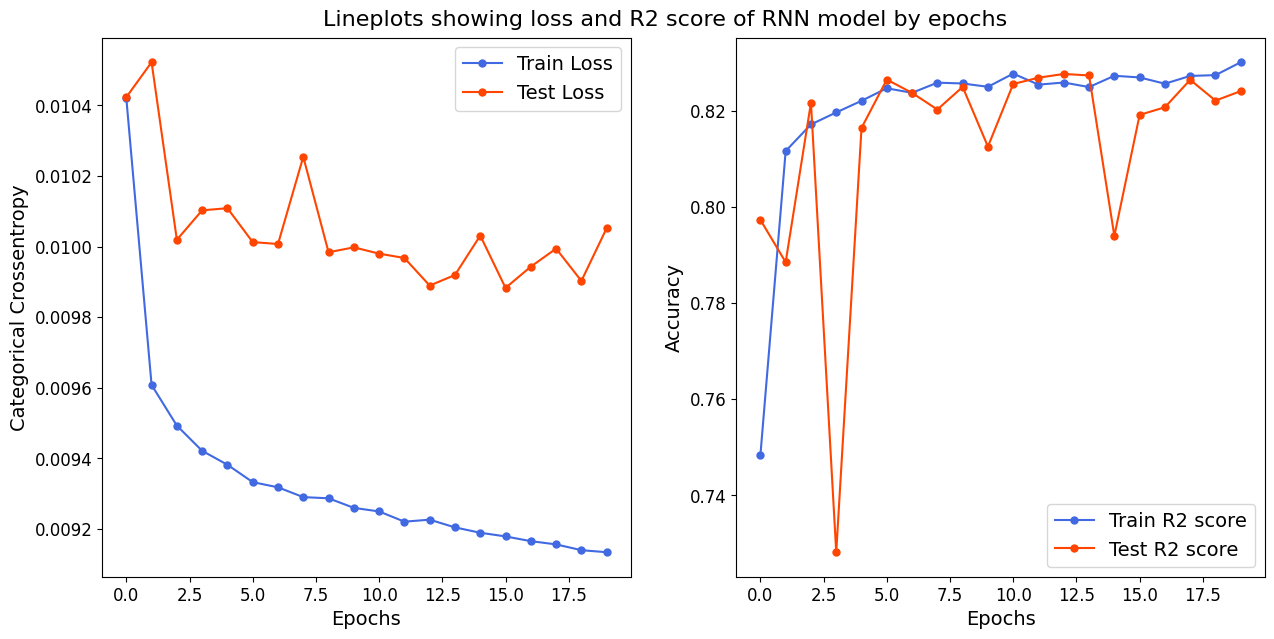

In [48]:
draw_train_loss(model_history)